**동별에는 지하철, 범죄, 등록인구, 경찰서, 파출소/지구대/치안센터 → 3class**


- 각각의 파일을 드라이브에 업로드하지 않음
- 병합한 데이터만 드라이브에 업로드

In [ ]:
### 데이터 동별로 병합 ###


import pandas as pd

# 1. 각 파일 읽기
subway_data = pd.read_excel('/mnt/data/동별_지하철_개수.xlsx')
crime_data = pd.read_excel('/mnt/data/법정동별 범죄건수.xlsx')
population_data = pd.read_excel('/mnt/data/population_data.xlsx')
police_station_data = pd.read_csv('/mnt/data/서울시 경찰서_법정동.csv')
security_center_data = pd.read_csv('/mnt/data/서울시 치안센터_법정동.csv')
police_office_data = pd.read_csv('/mnt/data/서울시 파출소 지구대_법정동.csv')

# 2. 열 이름 표준화
crime_data.rename(columns={'동별(1)': '법정동'}, inplace=True)  # '동별(1)'을 '법정동'으로 변경
population_data.rename(columns={'dong_name': '법정동'}, inplace=True)  # 'dong_name'을 '법정동'으로 변경
police_station_data.rename(columns={'동': '법정동'}, inplace=True)  # '동'을 '법정동'으로 변경
security_center_data.rename(columns={'동': '법정동'}, inplace=True)  # '동'을 '법정동'으로 변경
police_office_data.rename(columns={'동': '법정동'}, inplace=True)  # '동'을 '법정동'으로 변경

# 3. 데이터 병합
data_frames = [
    subway_data,
    crime_data[['법정동']],  # '법정동' 열만 사용
    population_data,
    police_station_data,
    security_center_data,
    police_office_data
]

merged_data = subway_data
for df in data_frames[1:]:
    merged_data = pd.merge(merged_data, df, on='법정동', how='outer')  # '법정동' 기준 병합

# 4. 결과 저장
output_file = '/mnt/data/merged_data.xlsx'
merged_data.to_excel(output_file, index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/동별_지하철_개수.xlsx'

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 엑셀 파일 경로 설정
data_file_path = '/content/drive/MyDrive/merged_data.xlsx'

# 엑셀 파일 읽기
data = pd.read_excel(data_file_path)

# 데이터 확인
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   법정동  역 개수 gu_name  population     시도경찰청     위치    경찰서명칭        경찰서주소  \
0  가락동   5.0     송파구     83115.0  서울특별시경찰청  서울특별시  서울송파경찰서  송파구 중대로 221   
1  가산동   1.0     금천구     24871.0       NaN    NaN      NaN          NaN   
2  갈월동   1.0     용산구      2709.0       NaN    NaN      NaN          NaN   
3  갈현동   2.0     은평구     41535.0       NaN    NaN      NaN          NaN   
4  거여동   1.0     송파구     52583.0       NaN    NaN      NaN          NaN   

        위도_x        경도_x  ...   연번_y 시도청_y 경찰서_y  관서명   구분          전화번호  \
0  37.501849  127.127601  ...  206.0   서울청  서울송파   가락  지구대  02-3402-6304   
1        NaN         NaN  ...  129.0   서울청  서울금천   가산  파출소   02-864-0113   
2        NaN         NaN  ...    NaN   NaN   NaN  NaN  NaN           NaN   
3        NaN         NaN  ...  227.0   서울청  서울은평  연신내  지구대   02-350-1936   
4        NaN         NaN  ...    NaN   N

In [31]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 병합된 데이터 로드
merged_data = pd.read_excel('/content/drive/MyDrive/merged_data.xlsx')

# 클러스터링에 사용할 주요 변수 선택 (열 이름 확인 후 수정)
features = ['범죄 건수', '역 개수', 'population']  # 실제 열 이름에 맞게 수정 필요
print("Columns in data:", merged_data.columns)  # 열 이름 확인

# 없는 열 처리
for col in features:
    if col not in merged_data.columns:
        print(f"Warning: {col} not found in data. Filling with 0.")
        merged_data[col] = 0

# 결측값 처리
merged_data[features] = merged_data[features].fillna(0)

# 데이터 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merged_data[features])

# K-Means 모델 적용 (클러스터 개수 3개로 설정)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# 결과 저장
output_file = '/content/drive/MyDrive/clustered_data.xlsx'
merged_data.to_excel(output_file, index=False)

print("Clustering complete. File saved to:", output_file)


Columns in data: Index(['법정동', '역 개수', 'gu_name', 'population', '시도경찰청', '위치', '경찰서명칭', '경찰서주소',
       '위도_x', '경도_x', '연번_x', '시도청_x', '경찰서_x', '치안센터명', '주소', '위도_y', '경도_y',
       '연번_y', '시도청_y', '경찰서_y', '관서명', '구분', '전화번호', '도로명 주소', '위도', '경도',
       '범죄 건수'],
      dtype='object')
Clustering complete. File saved to: /content/drive/MyDrive/clustered_data.xlsx


In [32]:
from google.colab import drive
drive.mount('/content/drive')

# Load the uploaded file with cluster data
# Corrected file path to include 'MyDrive'
clustered_data = pd.read_excel('/content/drive/MyDrive/clustered_data.xlsx')

# Check the counts for clusters (0, 1, 2) if the 'Cluster' column exists
if 'Cluster' in clustered_data.columns:
    cluster_counts = clustered_data['Cluster'].value_counts()
else:
    cluster_counts = "Cluster column not found in the dataset."

cluster_counts


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,count
Cluster,
0,1207
1,222
2,69


- 산점도 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


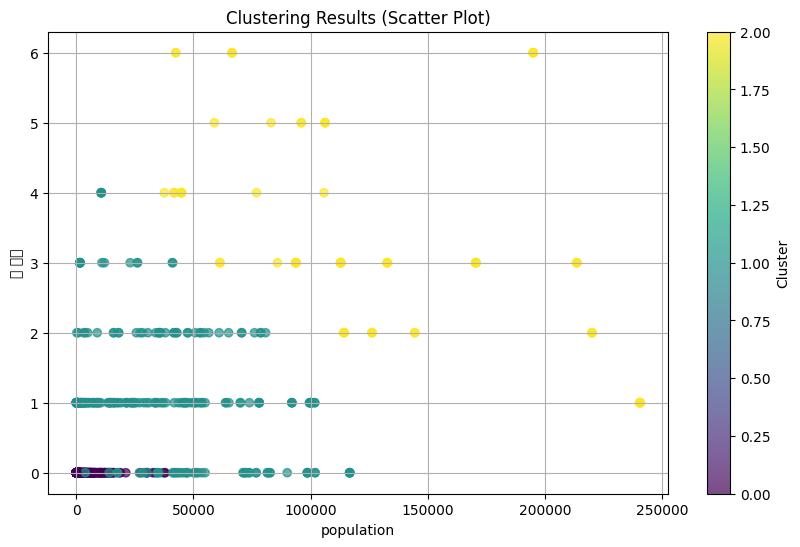

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the clustered data
clustered_data = pd.read_excel('/content/drive/MyDrive/clustered_data.xlsx')

# 클러스터링 변수 확인
features = ['population', '역 개수']  # 선택한 변수

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    clustered_data[features[0]], clustered_data[features[1]],  # Use clustered_data instead of merged_with_crime_data_final_v2
    c=clustered_data['Cluster'], cmap='viridis', alpha=0.7   # Use clustered_data instead of merged_with_crime_data_final_v2
)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Clustering Results (Scatter Plot)')
plt.grid(True)
plt.show()

- 지도 시각화 (Folium 사용)

In [7]:
!pip install folium


In [10]:
import pandas as pd
import folium

# Load the data with cluster assignments
clustered_data = pd.read_excel('/content/drive/MyDrive/clustered_data.xlsx')

# 비정상적인 값을 NaN으로 변환
clustered_data['위도'] = pd.to_numeric(clustered_data['위도'], errors='coerce')
clustered_data['경도'] = pd.to_numeric(clustered_data['경도'], errors='coerce')

# 결측값 제거 (위도와 경도가 NaN인 행 제거)
map_data = clustered_data.dropna(subset=['위도', '경도'])

# 지도 생성
map_center = [37.5665, 126.9780]  # 서울 중심 좌표
m = folium.Map(location=map_center, zoom_start=11)

# 클러스터별 색상 설정
colors = ['red', 'blue', 'green']  # Cluster 0, 1, 2

# 지도에 데이터 추가
for _, row in map_data.iterrows():
    lat = row['위도']
    lon = row['경도']
    cluster = row['Cluster']  # 'Cluster' column is now available
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.6,
        popup=f"법정동: {row['법정동']}, Cluster: {cluster}"
    ).add_to(m)

# 지도 저장
m.save('/content/drive/MyDrive/clustered_map.html')
m


### DBSCAN

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 파일 로드
data_path = '/content/drive/MyDrive/merged_data.xlsx'
merged_data = pd.read_excel(data_path)

# 데이터 준비
features = ['범죄 건수', '역 개수', 'population']  # 주요 변수 선택
if all(feature in merged_data.columns for feature in features):
    data = merged_data[features].fillna(0)
else:
    raise ValueError("Required features are missing in the dataset.")

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps와 min_samples 값을 조정 가능
cluster_labels = dbscan.fit_predict(data_scaled)

# 클러스터 레이블 추가
merged_data['Cluster_DBSCAN'] = cluster_labels

# 클러스터 요약
cluster_counts = merged_data['Cluster_DBSCAN'].value_counts()
print("DBSCAN Cluster Counts:")
print(cluster_counts)

# 결과 저장
output_file = '/content/drive/MyDrive/dbscan_clustered_data_final.xlsx'
merged_data.to_excel(output_file, index=False)
print(f"Clustered data saved to {output_file}")


DBSCAN Cluster Counts:
Cluster_DBSCAN
 8     940
 9     289
 0     111
-1      67
 1      32
 10     12
 3      11
 5       7
 2       6
 4       6
 7       6
 11      6
 6       5
Name: count, dtype: int64
Clustered data saved to /content/drive/MyDrive/dbscan_clustered_data_final.xlsx


### DBSCAN 후처리

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 필요한 피처 선택
features = ['범죄 건수', '역 개수', 'population']
data = merged_data[features].fillna(0)

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# K-Means로 3개 클래스 재분류 (노이즈 포함)
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster_3Groups'] = kmeans.fit_predict(data_scaled)

# 각 클러스터 개수 출력
cluster_3groups_counts = merged_data['Cluster_3Groups'].value_counts()
print("Cluster Counts (3 Groups):")
print(cluster_3groups_counts)

# 결과 저장
output_file = '/content/drive/MyDrive/dbscan_to_3groups.xlsx'
merged_data.to_excel(output_file, index=False)

print(f"Clustered data with 3 groups (including noise) saved to {output_file}")


Cluster Counts (3 Groups):
Cluster_3Groups
0    1207
1     222
2      69
Name: count, dtype: int64
Clustered data with 3 groups (including noise) saved to /content/drive/MyDrive/dbscan_to_3groups.xlsx


### GMM (Gaussian Mixture Model)

In [37]:
from sklearn.mixture import GaussianMixture

# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_labels = gmm.fit_predict(data_scaled)

# 결과 추가
merged_data['Cluster_GMM'] = cluster_labels

# 클러스터 크기 확인
print(merged_data['Cluster_GMM'].value_counts())


Cluster_GMM
0    936
2    294
1    268
Name: count, dtype: int64


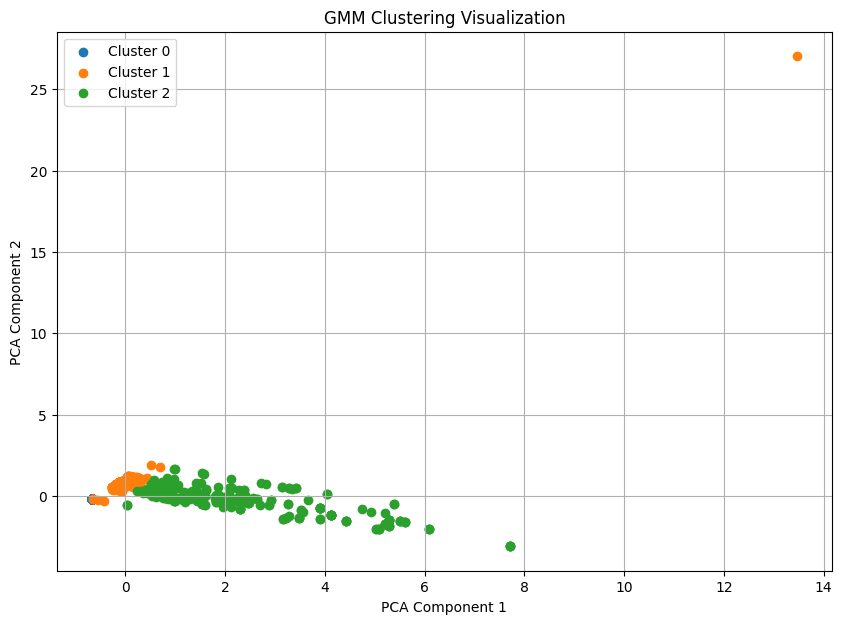

In [39]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 데이터 준비: 필요한 열 선택
features = ['범죄 건수', '역 개수', 'population']
data = merged_data[features].fillna(0)

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_labels = gmm.fit_predict(data_scaled)

# 클러스터 레이블 추가
clustered_data['Cluster_GMM'] = cluster_labels

# 차원 축소 (PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 시각화
plt.figure(figsize=(10, 7))
for cluster in np.unique(cluster_labels):
    plt.scatter(
        data_pca[cluster_labels == cluster, 0],
        data_pca[cluster_labels == cluster, 1],
        label=f"Cluster {cluster}"
    )

plt.title("GMM Clustering Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid()
plt.show()


In [41]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 로드
data_path = '/content/drive/MyDrive/merged_data.xlsx'
merged_data = pd.read_excel(data_path)

# 필요한 피처 선택
features = ['범죄 건수', '역 개수', 'population']
if all(feature in merged_data.columns for feature in features):
    data = merged_data[features].fillna(0)
else:
    raise ValueError("Required features are missing in the dataset.")

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# GMM 클러스터링
gmm = GaussianMixture(n_components=3, random_state=42)
cluster_labels = gmm.fit_predict(data_scaled)

# 클러스터 레이블 추가
merged_data['Cluster_GMM'] = cluster_labels

# 각 클러스터 개수 출력
cluster_gmm_counts = merged_data['Cluster_GMM'].value_counts()
print("Cluster Counts (GMM):")
print(cluster_gmm_counts)

# 결과 저장
output_file = '/content/drive/MyDrive/gmm_clustered_data.xlsx'
merged_data.to_excel(output_file, index=False)

print(f"Clustered data with GMM saved to {output_file}")


Cluster Counts (GMM):
Cluster_GMM
0    936
2    294
1    268
Name: count, dtype: int64
Clustered data with GMM saved to /content/drive/MyDrive/gmm_clustered_data.xlsx
